This script wraps up our research environment and prepares it for pipilining production

Here, my custom feature excration function has been moved to the utils.util file

In [28]:
# to handle data manipulation and plotting
import pandas as pd
import numpy as np
from math import sqrt
import scipy.stats as stats

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to persist the model and the scaler and pipeline
import joblib

# from sklearn
from sklearn.metrics import r2_score, get_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# from feature-engine
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder
import feature_engine.transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.wrappers import SklearnTransformerWrapper

# Custom function for feature extraction
from utils.util import date_variable_extraction

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv(r'./../dataset/1-raw/assessment_test_data.csv')
data = date_variable_extraction(data, 'date')
print(data.shape)
data.head()

(753, 107)


C:\Users\jaspe\Documents\Projects\Turing\sales_prediction_solution\research_environment_notebooks\utils\util.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['dt_week'] = df[var].dt.week  # week of year from 1 to 52


,date,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,units_sold,dt_day,dt_week,dt_month,dt_quater,dt_dayofweek,dt_is_weekend
0,2020-02-01,NaN,NaN,23.0,NaN,NaN,21.0,2.1973,NaN,NaN,15.2739,NaN,NaN,NaN,NaN,NaN,0.5568,NaN,NaN,1.0,NaN,NaN,NaN,17.1452,NaN,NaN,57.0,NaN,NaN,NaN,0.6841,0.7112,NaN,NaN,41.2141,NaN,NaN,42.8634,NaN,NaN,9.0,NaN,NaN,NaN,1.2242,13.0,2.3638,29.5852,NaN,1.8323,NaN,NaN,70.0,123.8373,68.6177,29.99,NaN,NaN,NaN,NaN,NaN,5.7495,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2151,NaN,25.3545,NaN,22.8820,NaN,NaN,NaN,NaN,-11.5191,0.7847,NaN,13.1122,39.0,67.0,NaN,NaN,5.7868,77.5917,NaN,NaN,37.0,NaN,64.0,51.2223,44.0,0.0,1,5,2,1,Saturday,1
1,2020-02-02,NaN,NaN,27.0,NaN,NaN,27.0,1.9945,NaN,NaN,13.7223,NaN,NaN,NaN,NaN,NaN,13.6438,NaN,NaN,1.0,NaN,NaN,NaN,66.9501,NaN,NaN,52.0,NaN,NaN,NaN,1.3896,2.7310,NaN,NaN,5.7830,500590.0,NaN,18.2881,NaN,NaN,11.0,NaN,NaN,NaN,1.1977,9.0,NaN,33.9121,NaN,12.7509,NaN,NaN,70.0,22.1150,52.0004,29.99,NaN,NaN,NaN,NaN,NaN,5.0426,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1713,NaN,14.8655,NaN,10.8485,NaN,NaN,NaN,NaN,73.4146,5.4652,NaN,12.7504,43.0,68.0,NaN,NaN,5.8770,10.8102,NaN,NaN,36.0,NaN,62.0,60.7981,56.0,0.0,2,5,2,1,Sunday,1
2,2020-02-03,NaN,NaN,23.0,NaN,NaN,19.0,1.5184,NaN,NaN,0.5006,NaN,NaN,NaN,NaN,NaN,1.7467,NaN,NaN,1.0,NaN,NaN,NaN,65.5042,NaN,NaN,53.0,NaN,NaN,NaN,5.5175,10.2251,NaN,NaN,18.2655,500590.0,NaN,45.6468,NaN,NaN,11.0,NaN,NaN,NaN,1.0727,16.0,2.2997,10.1836,NaN,13.4936,NaN,NaN,61.0,44.5890,88.7480,29.99,NaN,NaN,NaN,NaN,NaN,52.7741,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9234,NaN,12.6120,NaN,12.2109,NaN,NaN,NaN,NaN,39.0626,0.8892,NaN,28.1801,54.0,86.0,NaN,NaN,3.6639,12.4781,NaN,NaN,21.0,NaN,55.0,35.2005,48.0,0.0,3,6,2,1,Monday,0
3,2020-02-04,NaN,NaN,25.0,NaN,NaN,22.0,4.4803,NaN,NaN,1.9676,NaN,NaN,NaN,NaN,NaN,6.1486,NaN,NaN,1.0,NaN,NaN,NaN,99.3670,NaN,NaN,59.0,NaN,NaN,NaN,1.1937,4.9927,NaN,NaN,2.0493,500590.0,NaN,47.1688,NaN,NaN,7.0,NaN,NaN,NaN,NaN,12.0,26.6358,15.4114,NaN,0.8022,NaN,NaN,72.0,96.6576,39.3154,29.99,NaN,NaN,NaN,NaN,NaN,6.7933,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1667,NaN,17.2392,NaN,10.7743,NaN,NaN,NaN,NaN,67.1190,0.9127,NaN,26.6756,68.0,70.0,NaN,NaN,6.4765,73.0898,NaN,NaN,37.0,NaN,53.0,76.3142,38.0,0.0,4,6,2,1,Tuesday,0
4,2020-02-05,NaN,NaN,28.0,NaN,NaN,17.0,2.4623,NaN,NaN,8.2844,NaN,NaN,NaN,NaN,NaN,14.8797,NaN,NaN,1.0,NaN,NaN,NaN,108.5501,NaN,NaN,69.0,NaN,NaN,NaN,1.1585,3.7804,NaN,NaN,0.2248,500590.0,NaN,31.5702,NaN,NaN,5.0,NaN,NaN,NaN,1.2443,8.0,3.7091,29.0262,NaN,NaN,NaN,NaN,56.0,120.1480,61.7043,29.99,NaN,NaN,NaN,NaN,NaN,17.4728,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6817,NaN,26.1200,NaN,19.9312,NaN,NaN,NaN,NaN,98.1468,1.5502,NaN,43.7177,49.0,76.0,NaN,NaN,7.2720,50.5264,NaN,NaN,36.0,NaN,39.0,25.8219,30.0,0.0,5,6,2,1,Wednesday,0


In [7]:
# Separate dataset into train and test
# Setting the seed with "random state=0", to make the notebook reusable

X_train, X_test, y_train, y_test = train_test_split(data, data.units_sold,
                                                    test_size=0.15,
                                                    random_state=0) 
X_train.shape, X_test.shape

# Creating train test splits to prevent overfitting

((640, 107), (113, 107))

### Target

In [8]:
# y_train = np.log(y_train)
# y_test = np.log(y_test)

### Config

In [16]:
FEATURES = pd.read_csv('./config/selected_features.csv', header=None)
FEATURES = [x for x in FEATURES[0] if x != '0']

CAT_VARS = [var for var in X_train.columns if 'dt' in var]

NUM_VARS = [var for var in X_train.columns if X_train[var].dtypes != 'O']

NUM_VARS_WITH_NA = [var for var in X_train.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes != 'O']

In [11]:
X_train = X_train[FEATURES]
X_test = X_test[FEATURES]

X_train.shape, X_test.shape

((640, 73), (113, 73))

In [12]:
X_train.head()

,feature_1,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_15,feature_16,feature_18,feature_19,feature_23,feature_24,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,feature_36,feature_37,feature_38,feature_39,feature_40,feature_43,feature_44,feature_45,feature_46,feature_47,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_56,feature_59,feature_60,feature_61,feature_63,feature_64,feature_66,feature_69,feature_70,feature_72,feature_74,feature_76,feature_78,feature_81,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,dt_day,dt_week,dt_month,dt_quater,dt_dayofweek,dt_is_weekend
682,1.0190,17.0,24.2857,10.5714,22.0,1.4024,27.7143,30.99,1.3008,1.4150,117.9431,2.0,2.0,96.9325,1.0000,56.0,2.4246,NaN,1.6325,18.4286,21.0000,4.1884,25.2857,89.5637,2.0,1.9778,9.0,8.8571,1.0278,15.0,15.6494,16.8583,3.7949,20.8000,28.7143,64.0,124.1719,92.5569,24.7143,0.0000,2.0,10.3943,2.1071,3.0,2.2857,14.4286,1.0000,1.8296,10.8227,-1.5939,16.6817,1.0397,37.8107,9.7819,1.0000,26.7791,51.0,71.0,8.8764,56.0566,1.7936,27.5667,45.0,1.00,47.0,46.6974,42.0,14,50,12,4,Tuesday,0
527,1.0000,27.0,1.2857,20.4286,24.0,2.1176,0.0000,29.99,NaN,1.0000,7.2083,1.0,2.0,57.5307,1.0000,62.0,1.0000,5.5703,46.7960,0.0000,25.4286,9.9997,2.5714,33.6762,1.0,1.0000,11.0,0.0000,0.8562,9.0,4.7817,48.0551,0.7044,14.7333,16.0000,63.0,92.4561,51.7030,12.4286,3.1429,1.0,1.0994,1.0000,2.0,0.0000,13.8571,1.0000,1.1905,0.4411,11.7850,19.0664,1.0000,62.7217,1.1240,1.0000,27.8554,49.0,76.0,5.0742,73.2680,1.0444,6.4000,33.0,1.00,50.0,46.5672,35.0,12,28,7,3,Monday,0
577,1.4150,42.0,20.8571,32.1429,21.0,0.9567,2.4286,29.99,29.2722,1.0000,1.6475,1.0,1.0,108.1435,1.3333,61.0,1.1333,3.2463,25.5162,27.5714,26.5714,1.4778,19.0000,26.8346,1.0,1.0000,7.0,28.2857,1.1016,9.0,11.2380,23.5567,8.8640,27.1667,30.4286,56.0,37.4248,47.5099,0.2857,24.7143,1.0,2.0640,1.0952,2.0,30.2857,20.7143,1.4667,1.0000,8.6386,33.5698,19.2586,1.9524,-13.3492,1.6358,1.5143,-1.7018,34.0,54.0,2.9565,47.7598,1.3422,6.6667,30.0,1.75,40.0,33.8229,38.0,31,35,8,3,Tuesday,0
367,1.3667,29.0,13.0000,14.5714,27.0,1.5478,0.0000,29.99,0.9619,1.1786,14.0662,1.0,2.0,-2.5516,1.0000,63.0,1.0000,3.2064,6.2774,20.1429,18.8571,11.3902,0.0000,56.5169,1.0,1.0417,10.0,13.4286,1.3073,22.0,10.9771,38.8791,3.3021,15.1000,12.2857,60.0,76.5214,102.4437,23.2857,21.0000,1.0,26.4323,1.5714,3.0,15.2857,30.8571,2.0000,2.0000,5.6237,18.1591,15.5239,1.2500,15.7672,NaN,1.8571,31.0778,35.0,74.0,1.6842,5.5982,1.4917,8.0000,34.0,1.00,51.0,40.5081,29.0,2,5,2,1,Tuesday,0
249,1.3244,30.0,29.2857,24.1429,16.0,1.4349,11.0000,29.99,6.4413,1.1905,23.4796,1.0,1.0,19.9215,2.0000,58.0,1.0000,12.0401,1.2531,26.0000,17.8571,2.6538,22.8571,25.3293,1.0,1.0000,13.0,29.8571,1.0462,9.0,1.7870,27.9821,3.1970,18.9000,0.2857,72.0,58.7936,43.8164,19.1429,19.2857,1.0,1.1010,1.0000,0.0,28.1429,22.4286,1.0000,1.0000,0.6770,1.9389,20.1037,1.0000,74.9909,5.8611,1.0000,21.3823,32.0,52.0,11.7079,70.4435,1.0000,16.9667,36.0,1.20,41.0,65.7996,39.0,7,41,10,4,Wednesday,0


In [48]:
# Loading best performing model devloped in the model development script
LASSO_RESULT = joblib.load(f'./../model/LASSO_model.sav')

In [57]:
# set up the pipeline
sales_pred_pipe = Pipeline([
    # ===== IMPUTATION ===== with the mean
    ('mean_imputation', MeanMedianImputer(
        imputation_method='mean', variables=NUM_VARS_WITH_NA)
    ),
    
    # ==== CATEGORICAL ENCODING ==== using the target mean
    ('categorical_encoding', OrdinalEncoder(
        encoding_method='ordered',
        variables=CAT_VARS)
    ),
   
    # ==== VARIABLE TRANSFORMATION ====
    ('variable_transformation', vt.YeoJohnsonTransformer(
        variables=NUM_VARS)
    ),

    # ==== OUTLIER HANDLING ====
    ('winsorizer_capping', Winsorizer(
        capping_method='gaussian',
        tail='both', # cap left, right or both tails 
        fold=3,
        variables=FEATURES
    )),
    
    # ==== FEATURE SCALING ====
    ('scaler', MinMaxScaler()),
    

    # ==== MODEL TRAINING ====     
    ('Lasso', LASSO_RESULT),
])

In [58]:
sales_pred_pipe.fit(X_train, y_train)

C:\Users\jaspe\anaconda3\envs\sales_predicition\lib\site-packages\scipy\stats\morestats.py:1476: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\jaspe\anaconda3\envs\sales_predicition\lib\site-packages\scipy\optimize\optimize.py:2117: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\jaspe\anaconda3\envs\sales_predicition\lib\site-packages\scipy\optimize\optimize.py:2118: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
C:\Users\jaspe\anaconda3\envs\sales_predicition\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\jaspe\anaconda3\envs\sales_predicition\lib\site-packages\scipy\optimize\optimize.py:2115: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\jaspe\anaconda3\envs\sales_predicition\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Pipeline(steps=[('mean_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['feature_1', 'feature_3',
                                              'feature_4', 'feature_5',
                                              'feature_6', 'feature_7',
                                              'feature_8', 'feature_9',
                                              'feature_10', 'feature_15',
                                              'feature_16', 'feature_18',
                                              'feature_23', 'feature_24',
                                              'feature_26', 'feature_27',
                                              'feature_30', 'feature_31',
                                              'feature_32', 'feature_33',
                                              'feature_...
                                       'feature_38', 'feature_39', 'feature_40',
                               

train mse: 5.734789061532517e+46
train rmse: 2.394741961367136e+23
train r2: 0.6196600680272585

test mse: 1.561961845752926e+49
test rmse: 3.9521662993261377e+24
test r2: 0.5159956026843888
Average Units Sold:  13.893805309734514
Average Units Sold -prediction:  14.905453502327637


<AxesSubplot:>

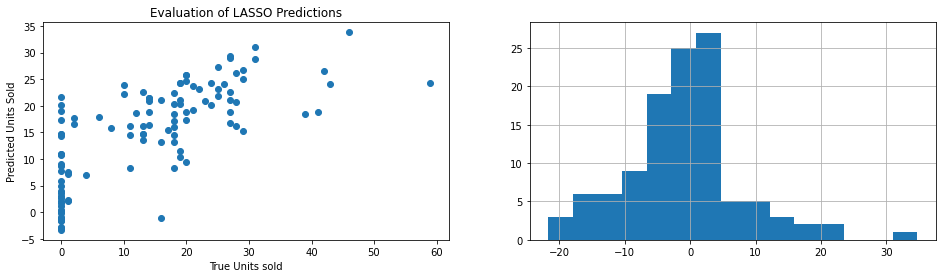

In [59]:
# test and visualize result
pred = sales_pred_pipe.predict(X_train)
print('train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train r2: {}'.format(r2_score(y_train, pred)))
print()

# make predictions for test set
pred = sales_pred_pipe.predict(X_test)
print('test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test r2: {}'.format(r2_score(y_test, pred)))
print('Average Units Sold: ', y_test.mean())
print('Average Units Sold -prediction: ', pred.mean())

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_test, sales_pred_pipe.predict(X_test))
plt.xlabel('True Units sold')
plt.ylabel('Predicted Units Sold')
plt.title(f'Evaluation of LASSO Predictions')

# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

# histogram of error predictions test
plt.subplot(1, 2, 2)
errors = y_test - sales_pred_pipe.predict(X_test)
errors.hist(bins=15)

Results match the "4_model_development" script. Reproducible pipeline successfully implemented.

In [61]:
# now let's save the scaler

joblib.dump(sales_pred_pipe, './../pipeline/sales_pipe.joblib')

['./../pipeline/sales_pipe.joblib']

In [64]:
### Score new data
data = pd.read_csv(r'./../dataset/1-raw/assessment_test_data.csv', nrows=10)
data = date_variable_extraction(data, 'date')
data = data[FEATURES]
new_preds = sales_pred_pipe.predict(data)

C:\Users\jaspe\Documents\Projects\Turing\sales_prediction_solution\research_environment_notebooks\utils\util.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['dt_week'] = df[var].dt.week  # week of year from 1 to 52


<AxesSubplot:>

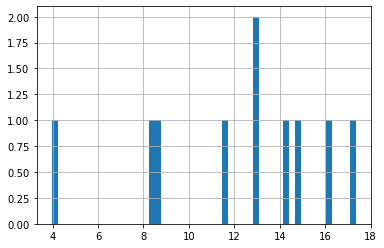

In [66]:
pd.Series(new_preds).hist(bins=50)